**KMeans Clustering:**

**Importing the required libraries:**

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the data:**

In [19]:
df = pd.read_csv("cleaned_merged_data.csv")


In [21]:
print(df.head())
print(df[['DepDelayMinutes', 'ArrDelayMinutes', 'AirTime', 'Distance']].head())

   FlightDate          Airline Origin Dest  Cancelled  Diverted  CRSDepTime  \
0  2019-04-19  JetBlue Airways    BOS  DEN      False     False        1829   
1  2019-04-20  JetBlue Airways    JFK  DEN      False     False        1951   
2  2019-04-20  JetBlue Airways    BOS  DEN      False     False        1829   
3  2019-04-21  JetBlue Airways    JFK  DEN      False     False        1951   
4  2019-04-21  JetBlue Airways    BOS  DEN      False     False         659   

   DepTime  DepDelayMinutes  DepDelay  ...   T2M_MIN   T2M_MAX      QV2M  \
0   2254.0            265.0     265.0  ...  0.489328  0.680193  0.204581   
1   2024.0             33.0      33.0  ...  0.653148  0.764718  0.237757   
2   1822.0              0.0      -7.0  ...  0.653148  0.764718  0.237757   
3   2014.0             23.0      23.0  ...  0.692903  0.670521  0.363349   
4    912.0            133.0     133.0  ...  0.692903  0.670521  0.363349   

       RH2M  PRECTOTCORR  WS10M_RANGE     WD10M  WS50M_RANGE     WD5

In [13]:
df.shape

(279724, 65)

In [14]:
df= df.drop('Airport', axis=1)
print("Columns after dropping 'airport':")
print(df.columns)

Columns after dropping 'airport':
Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'Flight_Number_Marketing_Airline', 'Operating_Airline', 'Tail_Number',
       'Flight_Number_Operating_Airline', 'OriginCityMarketID',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac', 'DestCityMarketID', 'DestCityName', 'DestState',
       'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15',
       'ArrivalDelayGroups', 'ArrTimeBlk', 'DistanceGroup',
       'DivAirportLandings', 'T2M_RANGE

**Data preprocessing:**

In [15]:
#Select Features for Clustering
# Replace the columns below with the relevant numeric columns in your dataset.
features = ['DepDelayMinutes', 'ArrDelayMinutes', 'AirTime', 'Distance']
X = df[features].copy()

In [17]:
#Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
# Save the scaled data to a CSV file
df_scaled.to_csv("scaled_data.csv", index=False)
print("Scaled data saved to scaled_data.csv")
print(df_scaled.head(10))
#Dimensionality Reduction with PCA
# Let’s reduce to 2 dimensions for easy plotting. You can choose 3 if you prefer a 3D plot.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
#Create a DataFrame with PCA components for easy plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

Scaled data saved to scaled_data.csv
   DepDelayMinutes  ArrDelayMinutes   AirTime  Distance
0         4.763335         4.024995  1.924751  2.040276
1         0.344436        -0.298222  1.624688  1.747208
2        -0.284115        -0.298222  1.907101  2.040276
3         0.153966        -0.298222  1.659989  1.747208
4         2.249133         1.427273  1.871799  2.040276
5         0.173013        -0.298222  1.924751  2.040276
6        -0.284115        -0.298222  1.801196  1.747208
7        -0.284115        -0.298222  2.295418  2.040276
8         1.125362         0.972197  2.189513  2.040276
9        -0.284115        -0.298222  1.783545  1.747208


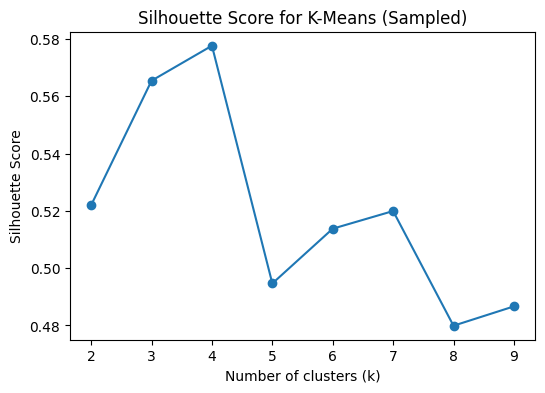

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_vals = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k,
                    n_init=10,
                    max_iter=300,
                    random_state=42,
                    algorithm='elkan')  # 'elkan' can be faster for smaller dimensional data
    kmeans.fit(X_pca)  # or X_scaled
    cluster_labels = kmeans.labels_

    # Use a subset of the data for silhouette scoring
    silhouette_avg = silhouette_score(
        X_pca,
        cluster_labels,
        sample_size=10000,     # Adjust this based on your data size
        random_state=42
    )
    silhouette_vals.append(silhouette_avg)

plt.figure(figsize=(6, 4))
plt.plot(K_range, silhouette_vals, marker='o')
plt.title("Silhouette Score for K-Means (Sampled)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


**Pick the Best "K":**

In [ ]:
optimal_k = 3


**Fit the Final K-Means Model:**

In [ ]:
from sklearn.cluster import KMeans

kmeans_final = KMeans(
    n_clusters=optimal_k,
    n_init=10,
    max_iter=300,
    random_state=42,
    algorithm='elkan'
)
kmeans_final.fit(X_pca)
cluster_labels = kmeans_final.labels_


**Create a Clustered DataFrame:**

In [ ]:
df_pca['KMeans_Cluster'] = cluster_labels


**Visualize the Clusters:**

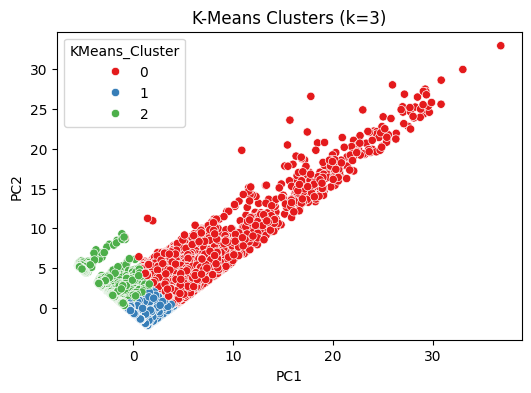

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='KMeans_Cluster',
    palette='Set1'
)
plt.title(f"K-Means Clusters (k={optimal_k})")
plt.show()


**Interpret Your Clusters:**

In [ ]:
print("Cluster Centers in PCA Space:")
print(kmeans_final.cluster_centers_)


Cluster Centers in PCA Space:
[[ 4.98185819  4.19625871]
 [ 0.28644659 -0.55533621]
 [-1.5178424   1.41739737]]


**Double-Check Performance:**


In [ ]:
import random
import numpy as np
from sklearn.metrics import silhouette_score
# Suppose you have X_pca (numpy array) and cluster_labels (list or array)
n_samples = X_pca.shape[0]
sample_size = min(10000, n_samples)  # or pick a smaller number if needed
sample_indices = random.sample(range(n_samples), sample_size)
# Create subsets
X_sample = X_pca[sample_indices]
labels_sample = cluster_labels[sample_indices]
# Compute silhouette on the subset
silhouette_avg = silhouette_score(X_sample, labels_sample, metric='euclidean')
# Convert to percentage
silhouette_percent = silhouette_avg * 100
print(f"Approx. Silhouette Score (Sampled): {silhouette_percent:.2f}%")



Approx. Silhouette Score (Sampled): 56.36%


**Hierarchical Clustering:**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load your data
df = pd.read_csv("cleaned_merged_data.csv")
df = df.drop('Airport', axis=1)

# Select features and scale data
features = ['DepDelayMinutes', 'ArrDelayMinutes', 'AirTime', 'Distance']
X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])




**Compute the Linkage Matrix:**

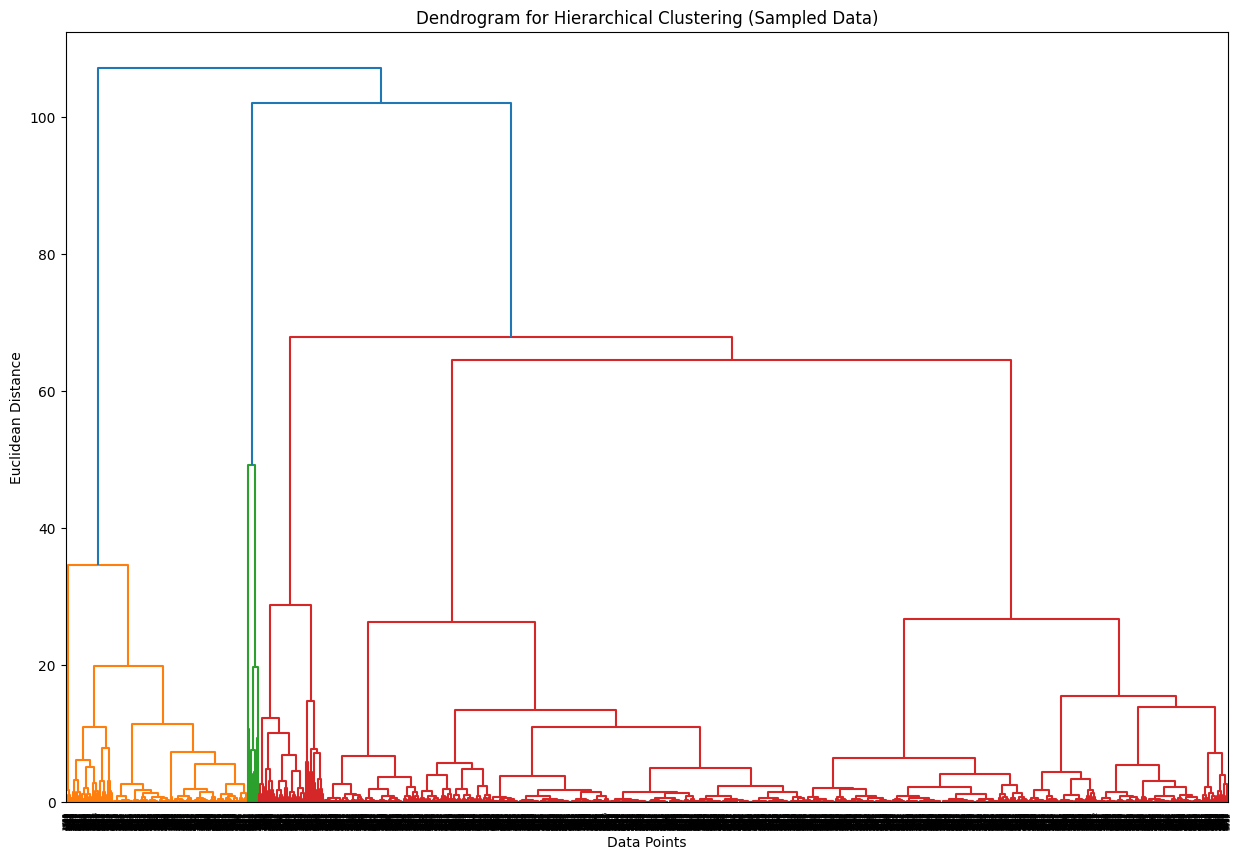

In [ ]:
X_pca_sample = X_pca.sample(n=5000, random_state=42)  # Use 5000 samples
Z = sch.linkage(X_pca_sample, method='ward')
# Compute and plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(X_pca_sample, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering (Sampled Data)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

**Observations:**

The dendrogram shows a noticeable jump near the top, suggesting that cutting around that height would split the flights into roughly four major clusters. Below that point, branches merge at smaller distances, indicating that each main cluster contains subgroups of flights with greater similarity. Overall, this structure suggests a few distinct divisions in the data before it branches into more fine-grained groups.

**Pick the Number of Clusters:**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import fcluster

num_clusters = 4


**Assign Cluster Labels with fcluster:**

In [ ]:
# fcluster will assign each sample to a cluster (1 through num_clusters)
cluster_labels = fcluster(Z, t=num_clusters, criterion='maxclust')


**Merge Labels Back into Your Sampled Data:**

In [ ]:
X_pca_sample['HC_Cluster'] = cluster_labels


**Visualize the Clusters:**

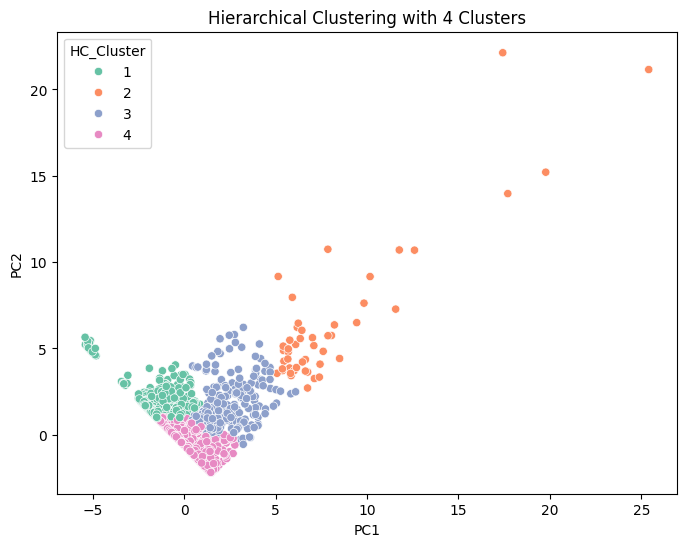

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=X_pca_sample,
    x='PC1',
    y='PC2',
    hue='HC_Cluster',
    palette='Set2'
)
plt.title(f"Hierarchical Clustering with {num_clusters} Clusters")
plt.show()


**DBSCAN Clustering:**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load the cleaned dataset
df = pd.read_csv("cleaned_merged_data.csv")

# 2. Identify categorical columns and apply label encoding
# We'll treat columns with dtype 'object' as categorical
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['FlightDate', 'Airline', 'Origin', 'Dest', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'Operating_Airline', 'Tail_Number', 'OriginCityName', 'OriginState', 'OriginStateName', 'DestCityName', 'DestState', 'DestStateName', 'DepTimeBlk', 'ArrTimeBlk', 'Airport']


In [3]:
df.shape

(279724, 65)

In [4]:
# Initialize a LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    # Convert to string in case of mixed types, then label encode
    df[col] = le.fit_transform(df[col].astype(str))

# 4. Prepare data for clustering: use all columns (both originally numeric and encoded categorical)
data = df.values

# 5. Scale the data so that features contribute equally to distance calculations
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [5]:
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M,Airport
0,108,9,22,0,False,False,1829,2254.0,265.0,265.0,...,0.489328,0.680193,0.204581,0.243367,0.00000,0.409695,0.035794,0.423316,0.049438,0
1,109,9,87,0,False,False,1951,2024.0,33.0,33.0,...,0.653148,0.764718,0.237757,0.143909,0.00000,0.258964,0.616331,0.442558,0.626124,0
2,109,9,22,0,False,False,1829,1822.0,0.0,-7.0,...,0.653148,0.764718,0.237757,0.143909,0.00000,0.258964,0.616331,0.442558,0.626124,0
3,110,9,87,0,False,False,1951,2014.0,23.0,23.0,...,0.692903,0.670521,0.363349,0.281567,0.09761,0.142098,0.878076,0.256367,0.847191,0
4,110,9,22,0,False,False,659,912.0,133.0,133.0,...,0.692903,0.670521,0.363349,0.281567,0.09761,0.142098,0.878076,0.256367,0.847191,0


In [6]:
data_scaled

array([[-0.76346997, -0.69661681, -1.40222472, ...,  1.30417479,
        -1.86185892,  0.        ],
       [-0.75375203, -0.69661681, -0.13734759, ...,  1.47505448,
         0.19200853,  0.        ],
       [-0.75375203, -0.69661681, -1.40222472, ...,  1.47505448,
         0.19200853,  0.        ],
       ...,
       [-1.56034159, -1.87163753,  0.44644186, ..., -1.05798569,
         0.69121937,  0.        ],
       [-1.56034159, -1.87163753, -1.71357909, ..., -1.05798569,
         0.69121937,  0.        ],
       [-1.56034159, -1.87163753, -0.04004935, ..., -1.05798569,
         0.69121937,  0.        ]])

In [7]:

# 6. Apply DBSCAN clustering
# Adjust eps and min_samples according to your dataset's scale and density.
dbscan = DBSCAN(eps=4.0, min_samples=66, metric='euclidean')
dbscan_labels = dbscan.fit_predict(data_scaled)

# Add the cluster labels to the original DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

In [8]:
# Report the number of clusters (excluding noise, which is labeled as -1)
unique_labels = set(dbscan_labels)
n_clusters = len(unique_labels - {-1})
print("Number of clusters (excluding noise):", n_clusters)
print("Number of noise points:", list(dbscan_labels).count(-1))

# 7. (Optional) Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame for the PCA-transformed data and include the cluster labels
pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
pca_df['DBSCAN_Cluster'] = dbscan_labels

Number of clusters (excluding noise): 6
Number of noise points: 45178


In [9]:
pca_df['DBSCAN_Cluster'].value_counts()

,count
DBSCAN_Cluster,
0,231991
-1,45178
2,1508
1,844
3,74
5,70
4,59


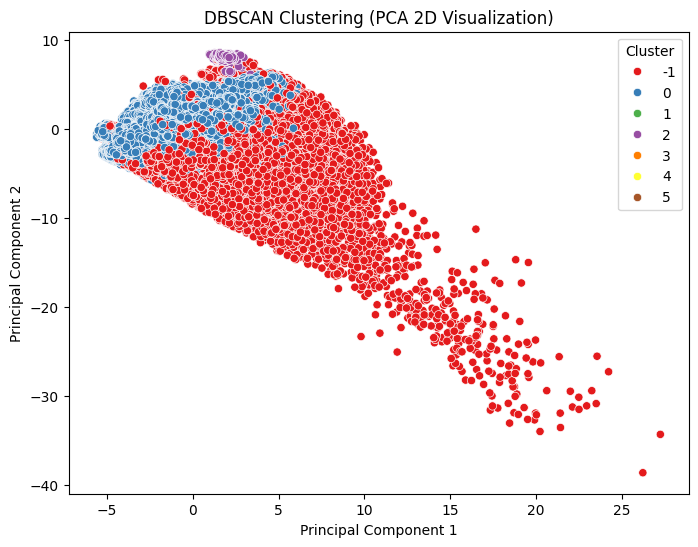

In [10]:
# 8. Visualize the clusters using a 2D scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=pca_df, palette='Set1')
plt.title("DBSCAN Clustering (PCA 2D Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()